In [ ]:
# I want to create a rectangular box around a center.
# that will allow me to display the detection and tracking success in ChimeraX over time in a movie. Nice!

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from numpy import genfromtxt


import pandas as pd

from mpl_toolkits import mplot3d
#%matplotlib notebook



#import cv2
import pims
from PIL import Image

import skimage

import json



# this is a cube as a mesh

In [9]:
padding = 5

limits = [-padding,+padding]
arange = np.arange(limits[0],limits[1]+1)

print(arange)
ran = range(limits[0],limits[1]+1)


coords = []
arange = np.arange(limits[0],limits[1]+1)
print(len(ran))
print(arange)
ran = range(limits[0],limits[1]+1)
print(ran)
tiff = np.zeros((len(ran),len(ran),len(ran)))
for i in ran:
    for j in  ran:
        for k in ran:
            value = 0
            if i in limits and j in limits:
                value = 1
            if j in limits and k in limits:
                value = 1
            if k in limits and i in limits:
                value = 1
            tiff[i,j,k]=value
            coords.append([i,j,k])


print(coords)

[-5 -4 -3 -2 -1  0  1  2  3  4  5]
11
[-5 -4 -3 -2 -1  0  1  2  3  4  5]
range(-5, 6)
[[-5, -5, -5], [-5, -5, -4], [-5, -5, -3], [-5, -5, -2], [-5, -5, -1], [-5, -5, 0], [-5, -5, 1], [-5, -5, 2], [-5, -5, 3], [-5, -5, 4], [-5, -5, 5], [-5, -4, -5], [-5, -4, -4], [-5, -4, -3], [-5, -4, -2], [-5, -4, -1], [-5, -4, 0], [-5, -4, 1], [-5, -4, 2], [-5, -4, 3], [-5, -4, 4], [-5, -4, 5], [-5, -3, -5], [-5, -3, -4], [-5, -3, -3], [-5, -3, -2], [-5, -3, -1], [-5, -3, 0], [-5, -3, 1], [-5, -3, 2], [-5, -3, 3], [-5, -3, 4], [-5, -3, 5], [-5, -2, -5], [-5, -2, -4], [-5, -2, -3], [-5, -2, -2], [-5, -2, -1], [-5, -2, 0], [-5, -2, 1], [-5, -2, 2], [-5, -2, 3], [-5, -2, 4], [-5, -2, 5], [-5, -1, -5], [-5, -1, -4], [-5, -1, -3], [-5, -1, -2], [-5, -1, -1], [-5, -1, 0], [-5, -1, 1], [-5, -1, 2], [-5, -1, 3], [-5, -1, 4], [-5, -1, 5], [-5, 0, -5], [-5, 0, -4], [-5, 0, -3], [-5, 0, -2], [-5, 0, -1], [-5, 0, 0], [-5, 0, 1], [-5, 0, 2], [-5, 0, 3], [-5, 0, 4], [-5, 0, 5], [-5, 1, -5], [-5, 1, -4], [-5, 1, -3

In [94]:
def getCubeMeshIndexes(cubeSize = 5, center=[0,0,0]):
# this is 5 on each side of the center
#center=np.array([224.29615185,362.37867407,45.60376889])
    indexes = []
    limits = np.array([-cubeSize,+cubeSize])
    for i in range(limits[0]-2,limits[1]+2):
        for j in  range(limits[0]-2,limits[1]+2):
            for k in range(limits[0]-2,limits[1]+2):
                value = 0
                if i in (limits+center[0]) and j in (limits+center[1]) and ((k > (limits+center[2])[0]) and (k < (limits+center[2])[1])) :
    #                print(limits+centerOfImage[0]+coord[0])
    #                print(limits+centerOfImage[1]+coord[1])
                    indexes.append([i,j,k])
                if j in limits+center[1] and k in limits+center[2] and ((i > (limits+center[0])[0]) and (i < (limits+center[0])[1])) :
                    indexes.append([i,j,k])
                if k in limits+center[2] and i in limits+center[0] and ((j > (limits+center[1])[0]) and (j < (limits+center[1])[1])) :
                    indexes.append([i,j,k])
    return(indexes)

In [95]:
cubeMeshIndexes = getCubeMeshIndexes()
print(cubeMeshIndexes)

[[-5, -5, -4], [-5, -5, -3], [-5, -5, -2], [-5, -5, -1], [-5, -5, 0], [-5, -5, 1], [-5, -5, 2], [-5, -5, 3], [-5, -5, 4], [-5, -4, -5], [-5, -4, 5], [-5, -3, -5], [-5, -3, 5], [-5, -2, -5], [-5, -2, 5], [-5, -1, -5], [-5, -1, 5], [-5, 0, -5], [-5, 0, 5], [-5, 1, -5], [-5, 1, 5], [-5, 2, -5], [-5, 2, 5], [-5, 3, -5], [-5, 3, 5], [-5, 4, -5], [-5, 4, 5], [-5, 5, -4], [-5, 5, -3], [-5, 5, -2], [-5, 5, -1], [-5, 5, 0], [-5, 5, 1], [-5, 5, 2], [-5, 5, 3], [-5, 5, 4], [-4, -5, -5], [-4, -5, 5], [-4, 5, -5], [-4, 5, 5], [-3, -5, -5], [-3, -5, 5], [-3, 5, -5], [-3, 5, 5], [-2, -5, -5], [-2, -5, 5], [-2, 5, -5], [-2, 5, 5], [-1, -5, -5], [-1, -5, 5], [-1, 5, -5], [-1, 5, 5], [0, -5, -5], [0, -5, 5], [0, 5, -5], [0, 5, 5], [1, -5, -5], [1, -5, 5], [1, 5, -5], [1, 5, 5], [2, -5, -5], [2, -5, 5], [2, 5, -5], [2, 5, 5], [3, -5, -5], [3, -5, 5], [3, 5, -5], [3, 5, 5], [4, -5, -5], [4, -5, 5], [4, 5, -5], [4, 5, 5], [5, -5, -4], [5, -5, -3], [5, -5, -2], [5, -5, -1], [5, -5, 0], [5, -5, 1], [5, -5, 2

In [96]:
imageSize = (100, 100, 100) # this is the output from cropping by 20
centerOfImage = np.array([imageSize[0]//2,imageSize[1]//2,imageSize[2]//2])-np.array([1,1,1])

newCenter = np.array([10,10,10])

image = np.zeros(imageSize)
#newCoords = np.array([[5,5,5],[4,5,5],[6,5,5],[5,4,5]])
coords = getCubeMeshIndexes()
newCoords = coords+newCenter
print('newCoordsShape',newCoords.shape)
print(newCoords)
print(len(newCoords))
print(image.shape)

#image[newCoords]=10
print(newCoords)
print('test')
for index in newCoords:
#    print('index',index)
    image[index[0],index[1],index[2]]=10

print(image)

data = image.astype('uint16')
metadata = dict(microscope='joh', shape=data.shape, dtype=data.dtype.str)
print(data.shape, data.dtype, metadata['microscope'])
metadata = json.dumps(metadata)
print(metadata)

skimage.external.tifffile.imsave('./box_arbitrary_test2.tif', data, description=metadata)

newCoordsShape (108, 3)
[[ 5  5  6]
 [ 5  5  7]
 [ 5  5  8]
 [ 5  5  9]
 [ 5  5 10]
 [ 5  5 11]
 [ 5  5 12]
 [ 5  5 13]
 [ 5  5 14]
 [ 5  6  5]
 [ 5  6 15]
 [ 5  7  5]
 [ 5  7 15]
 [ 5  8  5]
 [ 5  8 15]
 [ 5  9  5]
 [ 5  9 15]
 [ 5 10  5]
 [ 5 10 15]
 [ 5 11  5]
 [ 5 11 15]
 [ 5 12  5]
 [ 5 12 15]
 [ 5 13  5]
 [ 5 13 15]
 [ 5 14  5]
 [ 5 14 15]
 [ 5 15  6]
 [ 5 15  7]
 [ 5 15  8]
 [ 5 15  9]
 [ 5 15 10]
 [ 5 15 11]
 [ 5 15 12]
 [ 5 15 13]
 [ 5 15 14]
 [ 6  5  5]
 [ 6  5 15]
 [ 6 15  5]
 [ 6 15 15]
 [ 7  5  5]
 [ 7  5 15]
 [ 7 15  5]
 [ 7 15 15]
 [ 8  5  5]
 [ 8  5 15]
 [ 8 15  5]
 [ 8 15 15]
 [ 9  5  5]
 [ 9  5 15]
 [ 9 15  5]
 [ 9 15 15]
 [10  5  5]
 [10  5 15]
 [10 15  5]
 [10 15 15]
 [11  5  5]
 [11  5 15]
 [11 15  5]
 [11 15 15]
 [12  5  5]
 [12  5 15]
 [12 15  5]
 [12 15 15]
 [13  5  5]
 [13  5 15]
 [13 15  5]
 [13 15 15]
 [14  5  5]
 [14  5 15]
 [14 15  5]
 [14 15 15]
 [15  5  6]
 [15  5  7]
 [15  5  8]
 [15  5  9]
 [15  5 10]
 [15  5 11]
 [15  5 12]
 [15  5 13]
 [15  5 14]
 [15

In [99]:
imageSize = (100, 100, 100) # this is the output from cropping by 20
centerOfImage = np.array([imageSize[0]//2,imageSize[1]//2,imageSize[2]//2])-np.array([1,1,1])

# these are the coordinates that i want to place my box at
newCenters = np.array([[10,10,10],centerOfImage,[90,90,90],[20,50,30]])

image = np.zeros(imageSize)


for newCenter in newCenters:

    coords = getCubeMeshIndexes()
    newCoords = coords+newCenter
    print('newCoordsShape',newCoords.shape)
    print(newCoords)
    print(len(newCoords))
    print(image.shape)
    
    #image[newCoords]=10
    print(newCoords)
    print('test')
    for index in newCoords:
    #    print('index',index)
        image[index[0],index[1],index[2]]=10
    
    print(image)
    
    data = image.astype('uint16')
    metadata = dict(microscope='joh', shape=data.shape, dtype=data.dtype.str)
    print(data.shape, data.dtype, metadata['microscope'])
    metadata = json.dumps(metadata)
    print(metadata)
    
    skimage.external.tifffile.imsave('./box_arbitrary_test_3.tif', data, description=metadata)

newCoordsShape (108, 3)
[[ 5  5  6]
 [ 5  5  7]
 [ 5  5  8]
 [ 5  5  9]
 [ 5  5 10]
 [ 5  5 11]
 [ 5  5 12]
 [ 5  5 13]
 [ 5  5 14]
 [ 5  6  5]
 [ 5  6 15]
 [ 5  7  5]
 [ 5  7 15]
 [ 5  8  5]
 [ 5  8 15]
 [ 5  9  5]
 [ 5  9 15]
 [ 5 10  5]
 [ 5 10 15]
 [ 5 11  5]
 [ 5 11 15]
 [ 5 12  5]
 [ 5 12 15]
 [ 5 13  5]
 [ 5 13 15]
 [ 5 14  5]
 [ 5 14 15]
 [ 5 15  6]
 [ 5 15  7]
 [ 5 15  8]
 [ 5 15  9]
 [ 5 15 10]
 [ 5 15 11]
 [ 5 15 12]
 [ 5 15 13]
 [ 5 15 14]
 [ 6  5  5]
 [ 6  5 15]
 [ 6 15  5]
 [ 6 15 15]
 [ 7  5  5]
 [ 7  5 15]
 [ 7 15  5]
 [ 7 15 15]
 [ 8  5  5]
 [ 8  5 15]
 [ 8 15  5]
 [ 8 15 15]
 [ 9  5  5]
 [ 9  5 15]
 [ 9 15  5]
 [ 9 15 15]
 [10  5  5]
 [10  5 15]
 [10 15  5]
 [10 15 15]
 [11  5  5]
 [11  5 15]
 [11 15  5]
 [11 15 15]
 [12  5  5]
 [12  5 15]
 [12 15  5]
 [12 15 15]
 [13  5  5]
 [13  5 15]
 [13 15  5]
 [13 15 15]
 [14  5  5]
 [14  5 15]
 [14 15  5]
 [14 15 15]
 [15  5  6]
 [15  5  7]
 [15  5  8]
 [15  5  9]
 [15  5 10]
 [15  5 11]
 [15  5 12]
 [15  5 13]
 [15  5 14]
 [15

# real world example

In [100]:
trackCoords = np.array([[ 221.4703 ,  277.9795 ,   91.38771],
       [ 220.822  ,  277.8963 ,   90.87967],
       [ 220.4222 ,  277.7063 ,   90.69712],
       [ 220.3429 ,  277.4874 ,   91.01104],
       [ 219.4553 ,  277.9116 ,   91.49389],
       [ 219.0977 ,  278.4957 ,   90.78164],
       [ 218.7131 ,  278.1135 ,   91.17352],
       [ 218.3536 ,  278.8312 ,   91.38822],
       [ 218.5388 ,  277.6865 ,   90.81555],
       [ 217.2589 ,  278.5852 ,   90.58641],
       [ 217.4947 ,  278.8218 ,   91.13576],
       [ 217.6639 ,  278.8476 ,   90.03566],
       [ 218.6794 ,  278.791  ,   90.7134 ],
       [ 216.7301 ,  278.8924 ,   90.13244],
       [ 216.659  ,  278.9118 ,   90.61344],
       [ 216.0836 ,  278.6867 ,   90.43236],
       [ 215.9097 ,  278.6498 ,   90.99632],
       [ 216.7043 ,  278.268  ,   90.96675],
       [ 215.9443 ,  278.4203 ,   90.98492],
       [ 216.3498 ,  278.8052 ,   91.49843],
       [ 216.7664 ,  280.6083 ,   91.35841],
       [ 215.8896 ,  281.4993 ,   91.44501],
       [ 214.6865 ,  282.2683 ,   90.65191],
       [ 215.9946 ,  282.5424 ,   91.03349],
       [ 215.3786 ,  282.5117 ,   90.99929],
       [ 214.7606 ,  282.7682 ,   91.0642 ],
       [ 214.0186 ,  282.5296 ,   90.98131],
       [ 215.9687 ,  282.4692 ,   90.24141],
       [ 214.7293 ,  282.5629 ,   91.01494],
       [ 215.5661 ,  282.494  ,   91.15817],
       [ 215.4329 ,  283.4221 ,   91.00536],
       [ 217.2794 ,  283.5416 ,   91.29775],
       [ 216.7965 ,  283.5243 ,   91.41277],
       [ 217.1147 ,  284.0392 ,   91.63917],
       [ 216.5176 ,  283.2027 ,   92.54282],
       [ 216.4304 ,  282.8854 ,   92.48707],
       [ 216.0332 ,  282.5824 ,   93.0929 ],
       [ 215.5438 ,  283.1368 ,   92.96742],
       [ 215.4624 ,  282.9822 ,   92.64409],
       [ 215.6293 ,  282.7766 ,   92.69283],
       [ 215.0311 ,  281.9069 ,   92.51373],
       [ 214.3911 ,  282.4619 ,   91.71478],
       [ 213.7178 ,  281.9959 ,   91.89774],
       [ 213.6982 ,  281.3669 ,   91.1464 ],
       [ 214.3382 ,  281.8259 ,   91.95675],
       [ 212.4185 ,  281.8204 ,   91.02568],
       [ 212.6238 ,  281.8068 ,   91.74795],
       [ 213.1612 ,  283.46   ,   90.74298],
       [ 213.7857 ,  284.1756 ,   90.64004],
       [ 214.0736 ,  283.1232 ,   91.12304],
       [ 213.6584 ,  283.44   ,   90.72756],
       [ 212.8996 ,  283.4387 ,   89.69412],
       [ 212.6742 ,  284.6351 ,   90.08041],
       [ 211.9561 ,  284.6476 ,   88.88477],
       [ 212.6792 ,  284.0583 ,   89.1079 ],
       [ 212.07   ,  283.9421 ,   89.24052],
       [ 212.2518 ,  284.4191 ,   88.66614],
       [ 211.8461 ,  284.0374 ,   88.28664],
       [ 211.3988 ,  284.0222 ,   88.64306],
       [ 211.3633 ,  283.5286 ,   88.91398],
       [ 211.1901 ,  283.1207 ,   89.19275],
       [ 210.7339 ,  283.3193 ,   88.71169],
       [ 210.9144 ,  284.2091 ,   89.88249],
       [ 211.2933 ,  284.5225 ,   89.69967],
       [ 211.2327 ,  285.0417 ,   90.06551],
       [ 210.3565 ,  285.2871 ,   89.47467],
       [ 210.9917 ,  285.3841 ,   89.06202],
       [ 210.1969 ,  286.1176 ,   88.63071],
       [ 211.4179 ,  286.2297 ,   88.5087 ],
       [ 211.5519 ,  285.7297 ,   87.8305 ]])

In [ ]:
imageShape = np.array([40, 40, 40])

In [111]:
imageSize = (40, 40, 40) # this is the output from cropping by 20
newCenterOfImage = np.array([214, 281,  90])

centerOfImage = np.array([imageSize[0]//2,imageSize[1]//2,imageSize[2]//2])-np.array([1,1,1])

boxCenters = trackCoords.astype(int)-newCenterOfImage



counter = 0
for boxCenter in boxCenters:
    image = np.zeros(imageSize)

    meshIndexes = getCubeMeshIndexes()
    meshIndexesAdjusted = meshIndexes+boxCenter+centerOfImage
    #print('newCoordsShape',newCoords.shape)
    #print(newCoords)
    #print(len(newCoords))
    #print(image.shape)
    
    #image[newCoords]=10
    #print(newCoords)
    #print('test')
    #print(newCoords)
    for index in meshIndexesAdjusted:
        #print(index)
    #    print('index',index)
        image[index[0],index[1],index[2]]=10
    
    #print(image)
    
    data = image.astype('uint16')
    metadata = dict(microscope='joh', shape=data.shape, dtype=data.dtype.str)
    #print(data.shape, data.dtype, metadata['microscope'])
    metadata = json.dumps(metadata)
    #print(metadata)
    
    skimage.external.tifffile.imsave('./box_560_track_'+str(counter)+'.tif', data, description=metadata)
    counter = counter +1;

# ok... now can we do multiple cubes on one frame

In [112]:
inputParameters = pd.read_csv('../_inputParameters.csv',names=['key','value'])
inputParameters.style.set_properties(**{'text-align': 'left'})
#inputParameters

,key,value
0,inputDataFolder,/Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position5_Basal_apical_ObjScan/matlab_decon
1,outputDataFolder,/Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position5_Basal_apical_ObjScan/matlab_decon/output
2,movieLength,70
3,allowedMaxNumDetectionsPerFrame,3000
4,framerate_msec,5689
5,ch0_outputDataFolder,output_488
6,ch0_uniqueFilenameString,488nm_0
7,ch0_detectionFilename,Detection3D.mat
8,ch0_trackingFilename,trackedFeatures.mat
9,ch0_trackingCsvFilename,trackedFeatures.csv


In [115]:
def getInputParameter(inputParametersPandas,key):
    #this locates the row, gets the result out of its array form and strips whitespaces away
    return (((inputParametersPandas.loc[inputParametersPandas['key'] == key]).values)[0,1]).strip()

In [116]:
inputDataFolder = getInputParameter(inputParameters,"inputDataFolder")
outputDataFolder = getInputParameter(inputParameters,"outputDataFolder")
ch0_outputDataFolder  = getInputParameter(inputParameters,"ch0_outputDataFolder")
ch0_trackingCsvFilename = getInputParameter(inputParameters,"ch0_trackingCsvFilename")
ch1_outputDataFolder  = getInputParameter(inputParameters,"ch1_outputDataFolder")
ch1_trackingCsvFilename = getInputParameter(inputParameters,"ch1_trackingCsvFilename")

ch0_uniqueFilenameString = getInputParameter(inputParameters,"ch0_uniqueFilenameString")
ch1_uniqueFilenameString = getInputParameter(inputParameters,"ch1_uniqueFilenameString")
#trackColor = getInputParameter(inputParameters,"trackColor")
#trackingBildFilename = getInputParameter(inputParameters,"trackingBildFilename")
#framerate_msec = float(getInputParameter(inputParameters,"framerate_msec"))
movieLength = int(getInputParameter(inputParameters,"movieLength"))
#print(trackColor)






In [239]:
folder = outputDataFolder+'/'+ch1_outputDataFolder+'/'

data = pd.read_csv(folder+'puncta_1.csv',header=0)
data.columns = ["x","y","z","A"]
#allDetectedPunctaInFirstFrame = data[['x','y','z']].values.astype(int)-np.array([1,1,1])
#allDetectedPunctaInFirstFrame = data[['y','z','x']].values.astype(int)-np.array([1,1,1])
#allDetectedPunctaInFirstFrame = data[['z','x','y']].values.astype(int)-np.array([1,1,1])
allDetectedPunctaInFirstFrame = data[['z','y','x']].values.astype(int)-np.array([1,1,1])
print(np.sort(allDetectedPunctaInFirstFrame))

[[ 31 277 297]
 [ 32 306 321]
 [ 34 314 373]
 ..., 
 [145 196 248]
 [196 288 701]
 [196 342 701]]


In [166]:
test = np.array([[ 50 ,301,   7],
 [ 50, 301 ,  8],
 [ 50, 302 , -1],
 [ 50 ,302 ,  9],
 [ 50, 303 , -1]])

In [197]:
a = np.array([ 50, 300 , 9]) < np.array([ 50 ,302 ,  9])
print(a)
print( False in a)

[False  True False]
True


In [172]:
test>0

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True, False],
       [ True,  True,  True],
       [ True,  True, False]], dtype=bool)

In [202]:
def getRidOfNegativeIndexes(indexesArray):
    newIndexes = []
    for index in indexesArray:
        if(np.min(index)>=0):
            newIndexes.append(index)
    return(np.array(newIndexes))

a = getRidOfNegativeIndexes(test)
print(a)

[[ 50 301   7]
 [ 50 301   8]
 [ 50 302   9]]


In [215]:
def getIndexesWhereAllArrayEntriesArePositive(indexesArray):
    newIndexes = []
    for i in range(0,len(indexesArray)):
        index=indexesArray[i]
        if(np.min(index)>=0):
            newIndexes.append(i)
    return(np.array(newIndexes))

a = test[getIndexesWhereAllArrayEntriesArePositive(test)]
print(a)

[[ 50 301   7]
 [ 50 301   8]
 [ 50 302   9]]


In [240]:
# this works. Nice!

margin = 110
margin = 0
imageSizeOriginal =(201, 704, 600) # this is the size of one lattice frame
imageSize = np.array((imageSizeOriginal[0]+margin,imageSizeOriginal[1]+margin,imageSizeOriginal[2]+margin))
#imageSize =(1001, 1000, 1000) # this is the size of one lattice frame

centerOfImage = np.array([imageSize[0]//2,imageSize[1]//2,imageSize[2]//2])-np.array([1,1,1])
centerOfImage = np.array([imageSize[0]//2,imageSize[1]//2,imageSize[2]//2])-np.array([1,1,1])

boxCenters = allDetectedPunctaInFirstFrame

image = np.zeros(imageSize)
print(imageSize)

meshIndexes = getCubeMeshIndexes()
meshIndexesAdjustedArray = []
counter = 0

for boxCenter in boxCenters:
    
    
    if counter%100 == 0:
        print(counter)
        
        
 #   if(boxCenter[1]>imageSize[1]):
 #       boxCenter[1]=boxCenter[1]-imageSize[1]
 #       print(boxCenter)


    # I run into problems if the box Center leads to negative values -> prune them
    meshIndexesAdjusted = meshIndexes+boxCenter
    if np.min(meshIndexesAdjusted)<0:
        meshIndexesAdjusted = meshIndexesAdjusted[getIndexesWhereAllArrayEntriesArePositive(meshIndexesAdjusted)]
    meshIndexesAdjustedArray.append(meshIndexesAdjusted)
    
    
    # I run into problems if the box center leads to indexes that are larger than the image -> prune them
    boolArray = boxCenter+np.array([6,6,6]) >= imageSize
    if(True in boolArray):
        # these values are larger than the image size, subtract the image size first, get negative values
        tmp = imageSize-np.array([1,1,1]) - meshIndexesAdjusted
        # add the image size back after gotten rid of the negative ones
        idx=getIndexesWhereAllArrayEntriesArePositive(tmp)
        if(len(idx)==0):
            print('weird box center (not in image), excluded from display: ')
            print(boxCenter)
            print(imageSize)
            meshIndexesAdjusted = []
        else:
            meshIndexesAdjusted = meshIndexesAdjusted[idx]
            

    
    
    
    #print('newCoordsShape',newCoords.shape)
    #print(newCoords)
    #print(len(newCoords))
    #print(image.shape)
    
    #image[newCoords]=10
    #print(newCoords)
    #print('test')
    #print(newCoords)
    
        
    
    
    for index in meshIndexesAdjusted:
        #print(index)
    #    print('index',index)
        image[index[0],index[1],index[2]]=10
    
    #print(image)
    
    
    counter = counter+1

data = image.astype('uint16')
metadata = dict(microscope='joh', shape=data.shape, dtype=data.dtype.str)
metadata = json.dumps(metadata)
print(metadata)
skimage.external.tifffile.imsave('./boxes_560firstFrame_zyx_smaller.tif', data, description=metadata)


[201 704 600]
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
{"microscope": "joh", "shape": [201, 704, 600], "dtype": "<u2"}


In [180]:
for meshIndexArray in meshIndexesAdjustedArray:
    if np.min(meshIndexArray)<0:
        print(meshIndexArray)

In [164]:
# this works. Nice!

margin = 110
imageSizeOriginal =(201, 704, 600) # this is the size of one lattice frame
imageSize = (imageSizeOriginal[0]+margin,imageSizeOriginal[2]+margin,imageSizeOriginal[2]+margin)
#imageSize =(1001, 1000, 1000) # this is the size of one lattice frame

centerOfImageOirignal = np.array([imageSizeOriginal[0]//2,imageSizeOriginal[1]//2,imageSizeOriginal[2]//2])-np.array([1,1,1])
centerOfImage = np.array([imageSize[0]//2,imageSize[1]//2,imageSize[2]//2])-np.array([1,1,1])
centerDifference = centerOfImage-centerOfImageOirignal

boxCenters = allDetectedPunctaInFirstFrame

image = np.zeros(imageSize)

meshIndexes = getCubeMeshIndexes()
meshIndexesAdjustedArray = []
counter = 0
for boxCenter in boxCenters:
    if counter%100 == 0:
        print(counter)


    meshIndexesAdjusted = meshIndexes+boxCenter+centerDifference
    meshIndexesAdjustedArray.append(meshIndexesAdjusted)
    #print('newCoordsShape',newCoords.shape)
    #print(newCoords)
    #print(len(newCoords))
    #print(image.shape)
    
    #image[newCoords]=10
    #print(newCoords)
    #print('test')
    #print(newCoords)
    for index in meshIndexesAdjusted:
        #print(index)
    #    print('index',index)
        image[index[0],index[1],index[2]]=10
    
    #print(image)
    
    
    counter = counter+1

data = image.astype('uint16')
metadata = dict(microscope='joh', shape=data.shape, dtype=data.dtype.str)
metadata = json.dumps(metadata)
print(metadata)
skimage.external.tifffile.imsave('./boxes_560firstFrame_zyx_smaller_test.tif', data, description=metadata)



0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
{"microscope": "joh", "shape": [311, 710, 710], "dtype": "<u2"}


In [22]:
imageSize = (100, 100, 100) # this is the output from cropping by 20
centerOfImage = np.array([imageSize[0]//2,imageSize[1]//2,imageSize[2]//2])-np.array([1,1,1])

newCenter = np.array([10,10,10])

image = np.zeros(imageSize)
newCoords = coords+newCenter
print(newCoords)
print(len(newCoords))
print(image.shape)

image[newCoords]=10


print(image)

data = image.astype('uint16')
metadata = dict(microscope='joh', shape=data.shape, dtype=data.dtype.str)
print(data.shape, data.dtype, metadata['microscope'])
metadata = json.dumps(metadata)
print(metadata)

skimage.external.tifffile.imsave('./box_arbitrary_test.tif', data, description=metadata)

[[ 5  5  5]
 [ 5  5  6]
 [ 5  5  7]
 ..., 
 [15 15 13]
 [15 15 14]
 [15 15 15]]
1331
(100, 100, 100)
[[[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 [[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 [[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 ..., 
 [[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 [[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.

In [12]:
test = np.array([0,0,0,0,0,0,0])
idx = [2,4]
test[idx]=1
print(test)

[0 0 1 0 1 0 0]


In [14]:
test = np.array([[0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[0,0,0,0,0,0,0]])
idx = [[2,1],[1,4]]
test[idx]=1
print(test)

[[0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


In [59]:
test = np.array([[[0,0,0,0,0,0,0],[0,0,0,0,0,0,0]],[[0,0,0,0,0,0,0],[0,0,0,0,0,0,0]],[[0,0,0,0,0,0,0],[0,0,0,0,0,0,0]]])
print(test.shape)
idx = [[1,1,1]]
test[idx]=1
print(test)

(3, 2, 7)
[[[0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]]

 [[1 1 1 1 1 1 1]
  [1 1 1 1 1 1 1]]

 [[0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]]]


In [60]:
test = np.array([[[0,0,0,0,0,0,0],[0,0,0,0,0,0,0]],[[0,0,0,0,0,0,0],[0,0,0,0,0,0,0]],[[0,0,0,0,0,0,0],[0,0,0,0,0,0,0]]])
print(test.shape)
idx = [1,1,1]
test[1,1,1]=1
print(test)
print(type(test))

(3, 2, 7)
[[[0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0]
  [0 1 0 0 0 0 0]]

 [[0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]]]
<class 'numpy.ndarray'>


In [51]:
y = np.arange(1000).reshape(10,10,10)
#print(y)
print(y[3,4,1])
y[3,4,1] = 0
print(y[3,4,1])
print(y)

341
0
[[[  0   1   2   3   4   5   6   7   8   9]
  [ 10  11  12  13  14  15  16  17  18  19]
  [ 20  21  22  23  24  25  26  27  28  29]
  [ 30  31  32  33  34  35  36  37  38  39]
  [ 40  41  42  43  44  45  46  47  48  49]
  [ 50  51  52  53  54  55  56  57  58  59]
  [ 60  61  62  63  64  65  66  67  68  69]
  [ 70  71  72  73  74  75  76  77  78  79]
  [ 80  81  82  83  84  85  86  87  88  89]
  [ 90  91  92  93  94  95  96  97  98  99]]

 [[100 101 102 103 104 105 106 107 108 109]
  [110 111 112 113 114 115 116 117 118 119]
  [120 121 122 123 124 125 126 127 128 129]
  [130 131 132 133 134 135 136 137 138 139]
  [140 141 142 143 144 145 146 147 148 149]
  [150 151 152 153 154 155 156 157 158 159]
  [160 161 162 163 164 165 166 167 168 169]
  [170 171 172 173 174 175 176 177 178 179]
  [180 181 182 183 184 185 186 187 188 189]
  [190 191 192 193 194 195 196 197 198 199]]

 [[200 201 202 203 204 205 206 207 208 209]
  [210 211 212 213 214 215 216 217 218 219]
  [220 221 222 223 224

In [35]:

limits = [0,10]
arange = np.arange(limits[0],limits[1]+1)
print(len(ran))
print(arange)
ran = range(limits[0],limits[1]+1)
print(ran)
tiff = np.zeros((len(ran),len(ran),len(ran)))
for i in ran:
    for j in  ran:
        for k in ran:
            value = 0
            if i in limits and j in limits:
                value = 1
            if j in limits and k in limits:
                value = 1
            if k in limits and i in limits:
                value = 1
            tiff[i,j,k]=value



11
[ 0  1  2  3  4  5  6  7  8  9 10]
range(0, 11)


In [36]:
data = tiff.astype('uint16')
metadata = dict(microscope='joh', shape=data.shape, dtype=data.dtype.str)
print(data.shape, data.dtype, metadata['microscope'])
metadata = json.dumps(metadata)
print(metadata)

skimage.external.tifffile.imsave('./box_mesh.tif', data, description=metadata)

(11, 11, 11) uint16 joh
{"microscope": "joh", "shape": [11, 11, 11], "dtype": "<u2"}


# this is a cube mesh centered on a given coordinate

In [98]:
#at the moment, the cube is at the origin
imageSize = (40, 40, 40) # this is the output from cropping by 20
cubeSize = 5 # this is 5 on each side of the center
#center=np.array([224.29615185,362.37867407,45.60376889])
coord = np.array([1,5,4]) # this coordinate is given as origin being in the center
coord = np.array([459,513,92]) - np.array([459,513,92])# this coordinate is given as origin being in the center

coord = np.array([214, 281,  90])- np.array([214, 281,  90])

centerOfImage = np.array([imageSize[0]//2,imageSize[1]//2,imageSize[2]//2])-np.array([1,1,1])


limits = [-cubeSize,+cubeSize]
image = np.zeros(imageSize)
for i in range(0,imageSize[0]):
    for j in  range(0,imageSize[1]):
        for k in range(0,imageSize[2]):
            value = 0
            if i in (limits+centerOfImage[0]+coord[0]) and j in (limits+centerOfImage[1]+coord[1]) and ((k > (limits+centerOfImage[2]+coord[2])[0]) and (k < (limits+centerOfImage[2]+coord[2])[1])) :
#                print(limits+centerOfImage[0]+coord[0])
#                print(limits+centerOfImage[1]+coord[1])
                value = 10
            if j in limits+centerOfImage[1]+coord[1] and k in limits+centerOfImage[2]+coord[2] and ((i > (limits+centerOfImage[0]+coord[0])[0]) and (i < (limits+centerOfImage[0]+coord[0])[1])) :
                value = 10
            if k in limits+centerOfImage[2]+coord[2] and i in limits+centerOfImage[0]+coord[0] and ((j > (limits+centerOfImage[1]+coord[1])[0]) and (j < (limits+centerOfImage[1]+coord[1])[1])) :
                value = 10
            image[i,j,k]=value


data = image.astype('uint16')
metadata = dict(microscope='joh', shape=data.shape, dtype=data.dtype.str)
print(data.shape, data.dtype, metadata['microscope'])
metadata = json.dumps(metadata)
print(metadata)

skimage.external.tifffile.imsave('./box_around_fiji_derived_coords.tif', data, description=metadata)

(40, 40, 40) uint16 joh
{"microscope": "joh", "shape": [40, 40, 40], "dtype": "<u2"}


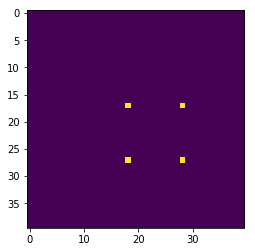

In [68]:
plt.imshow(image[1])

# make cubes around the detected coordinates of a track

In [100]:
trackCoords = np.array([[ 221.4703 ,  277.9795 ,   91.38771],
       [ 220.822  ,  277.8963 ,   90.87967],
       [ 220.4222 ,  277.7063 ,   90.69712],
       [ 220.3429 ,  277.4874 ,   91.01104],
       [ 219.4553 ,  277.9116 ,   91.49389],
       [ 219.0977 ,  278.4957 ,   90.78164],
       [ 218.7131 ,  278.1135 ,   91.17352],
       [ 218.3536 ,  278.8312 ,   91.38822],
       [ 218.5388 ,  277.6865 ,   90.81555],
       [ 217.2589 ,  278.5852 ,   90.58641],
       [ 217.4947 ,  278.8218 ,   91.13576],
       [ 217.6639 ,  278.8476 ,   90.03566],
       [ 218.6794 ,  278.791  ,   90.7134 ],
       [ 216.7301 ,  278.8924 ,   90.13244],
       [ 216.659  ,  278.9118 ,   90.61344],
       [ 216.0836 ,  278.6867 ,   90.43236],
       [ 215.9097 ,  278.6498 ,   90.99632],
       [ 216.7043 ,  278.268  ,   90.96675],
       [ 215.9443 ,  278.4203 ,   90.98492],
       [ 216.3498 ,  278.8052 ,   91.49843],
       [ 216.7664 ,  280.6083 ,   91.35841],
       [ 215.8896 ,  281.4993 ,   91.44501],
       [ 214.6865 ,  282.2683 ,   90.65191],
       [ 215.9946 ,  282.5424 ,   91.03349],
       [ 215.3786 ,  282.5117 ,   90.99929],
       [ 214.7606 ,  282.7682 ,   91.0642 ],
       [ 214.0186 ,  282.5296 ,   90.98131],
       [ 215.9687 ,  282.4692 ,   90.24141],
       [ 214.7293 ,  282.5629 ,   91.01494],
       [ 215.5661 ,  282.494  ,   91.15817],
       [ 215.4329 ,  283.4221 ,   91.00536],
       [ 217.2794 ,  283.5416 ,   91.29775],
       [ 216.7965 ,  283.5243 ,   91.41277],
       [ 217.1147 ,  284.0392 ,   91.63917],
       [ 216.5176 ,  283.2027 ,   92.54282],
       [ 216.4304 ,  282.8854 ,   92.48707],
       [ 216.0332 ,  282.5824 ,   93.0929 ],
       [ 215.5438 ,  283.1368 ,   92.96742],
       [ 215.4624 ,  282.9822 ,   92.64409],
       [ 215.6293 ,  282.7766 ,   92.69283],
       [ 215.0311 ,  281.9069 ,   92.51373],
       [ 214.3911 ,  282.4619 ,   91.71478],
       [ 213.7178 ,  281.9959 ,   91.89774],
       [ 213.6982 ,  281.3669 ,   91.1464 ],
       [ 214.3382 ,  281.8259 ,   91.95675],
       [ 212.4185 ,  281.8204 ,   91.02568],
       [ 212.6238 ,  281.8068 ,   91.74795],
       [ 213.1612 ,  283.46   ,   90.74298],
       [ 213.7857 ,  284.1756 ,   90.64004],
       [ 214.0736 ,  283.1232 ,   91.12304],
       [ 213.6584 ,  283.44   ,   90.72756],
       [ 212.8996 ,  283.4387 ,   89.69412],
       [ 212.6742 ,  284.6351 ,   90.08041],
       [ 211.9561 ,  284.6476 ,   88.88477],
       [ 212.6792 ,  284.0583 ,   89.1079 ],
       [ 212.07   ,  283.9421 ,   89.24052],
       [ 212.2518 ,  284.4191 ,   88.66614],
       [ 211.8461 ,  284.0374 ,   88.28664],
       [ 211.3988 ,  284.0222 ,   88.64306],
       [ 211.3633 ,  283.5286 ,   88.91398],
       [ 211.1901 ,  283.1207 ,   89.19275],
       [ 210.7339 ,  283.3193 ,   88.71169],
       [ 210.9144 ,  284.2091 ,   89.88249],
       [ 211.2933 ,  284.5225 ,   89.69967],
       [ 211.2327 ,  285.0417 ,   90.06551],
       [ 210.3565 ,  285.2871 ,   89.47467],
       [ 210.9917 ,  285.3841 ,   89.06202],
       [ 210.1969 ,  286.1176 ,   88.63071],
       [ 211.4179 ,  286.2297 ,   88.5087 ],
       [ 211.5519 ,  285.7297 ,   87.8305 ]])

In [101]:
centerOfMass = np.array([ 214.98012571,  281.93155857,   90.67524957])

In [103]:
trackCoordsCentered = (trackCoords-trackCoords[0]).astype(int)
#print(trackCoordsCentered)

#at the moment, the cube is at the origin

# these are 560nm coordinates

imageSize = (40, 40, 40) # this is the output from cropping by 20
centerOfImage = np.array([imageSize[0]//2,imageSize[1]//2,imageSize[2]//2])
cubeSize = 5 # this is 5 on each side of the center

#center=np.array([224.29615185,362.37867407,45.60376889])
counter = 0
for coord in trackCoordsCentered[0:10]:

    
    
    
    limits = [-cubeSize,+cubeSize]
    image = np.zeros(imageSize)
    for i in range(0,imageSize[0]):
        for j in  range(0,imageSize[1]):
            for k in range(0,imageSize[2]):
                value = 0
                if i in (limits+centerOfImage[0]+coord[0]) and j in (limits+centerOfImage[1]+coord[1]) and ((k > (limits+centerOfImage[2]+coord[2])[0]) and (k < (limits+centerOfImage[2]+coord[2])[1])) :
    #                print(limits+centerOfImage[0]+coord[0])
    #                print(limits+centerOfImage[1]+coord[1])
                    value = 10
                if j in limits+centerOfImage[1]+coord[1] and k in limits+centerOfImage[2]+coord[2] and ((i > (limits+centerOfImage[0]+coord[0])[0]) and (i < (limits+centerOfImage[0]+coord[0])[1])) :
                    value = 10
                if k in limits+centerOfImage[2]+coord[2] and i in limits+centerOfImage[0]+coord[0] and ((j > (limits+centerOfImage[1]+coord[1])[0]) and (j < (limits+centerOfImage[1]+coord[1])[1])) :
                    value = 10
                #center point
                if i == centerOfImage[0] and j == centerOfImage[1] and k == centerOfImage[2]:
                    value = 10
                image[i,j,k]=value
    
    
    data = image.astype('uint16')
    metadata = dict(microscope='joh', shape=data.shape, dtype=data.dtype.str)
#    print(data.shape, data.dtype, metadata['microscope'])
    metadata = json.dumps(metadata)
#    print(metadata)
    
    skimage.external.tifffile.imsave('./box_by_coord_in_large_image_'+str(counter)+'.tif', data, description=metadata)
    counter = counter +1
    print(counter)

1
2
3
4
5
6
7
8
9
10


In [ ]:
# make a dot only

In [ ]:
#at the moment, the cube is at the origin
imageSize = (40, 40, 40) # this is the output from cropping by 20
cubeSize = 5 # this is 5 on each side of the center
#center=np.array([224.29615185,362.37867407,45.60376889])
coord = np.array([1,5,4]) # this coordinate is given as origin being in the center
centerOfImage = np.array([imageSize[0]//2,imageSize[1]//2,imageSize[2]//2])


limits = [-cubeSize,+cubeSize]
image = np.zeros(imageSize)
for i in range(0,imageSize[0]):
    for j in  range(0,imageSize[1]):
        for k in range(0,imageSize[2]):
            value = 0
            if i in (limits+centerOfImage[0]+coord[0]) and j in (limits+centerOfImage[1]+coord[1]) and ((k > (limits+centerOfImage[2]+coord[2])[0]) and (k < (limits+centerOfImage[2]+coord[2])[1])) :
#                print(limits+centerOfImage[0]+coord[0])
#                print(limits+centerOfImage[1]+coord[1])
                value = 10
            if j in limits+centerOfImage[1]+coord[1] and k in limits+centerOfImage[2]+coord[2] and ((i > (limits+centerOfImage[0]+coord[0])[0]) and (i < (limits+centerOfImage[0]+coord[0])[1])) :
                value = 10
            if k in limits+centerOfImage[2]+coord[2] and i in limits+centerOfImage[0]+coord[0] and ((j > (limits+centerOfImage[1]+coord[1])[0]) and (j < (limits+centerOfImage[1]+coord[1])[1])) :
                value = 10
            image[i,j,k]=value


data = image.astype('uint16')
metadata = dict(microscope='joh', shape=data.shape, dtype=data.dtype.str)
print(data.shape, data.dtype, metadata['microscope'])
metadata = json.dumps(metadata)
print(metadata)

skimage.external.tifffile.imsave('./box_by_coord_in_large_image_3.tif', data, description=metadata)

In [9]:
data = np.random.rand(2, 5, 3, 301, 219)
skimage.external.tifffile.imsave('temp.tif', data, compress=6, metadata={'axes': 'TZCYX'})

In [14]:

data = np.arange(256).reshape((16, 16)).astype('u1')
metadata = dict(microscope='george', shape=data.shape, dtype=data.dtype.str)
print(data.shape, data.dtype, metadata['microscope'])
metadata = json.dumps(metadata)
print(metadata)

skimage.external.tifffile.imsave('microscope.tif', data, description=metadata)

(16, 16) uint8 george
{"microscope": "george", "shape": [16, 16], "dtype": "|u1"}
